# -----------------------------------------------------
# Task 3: Cross-Country Comparison
# Notebook: compare_countries.ipynb
# Branch: compare-countries
# -----------------------------------------------------

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Inline plotting (for Jupyter)

In [2]:
%matplotlib inline

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


# -----------------------------------------------------
# Step 2: Load Cleaned Datasets
# -----------------------------------------------------

In [4]:
data_files = {
    "Benin": "../data/benin_clean.csv",
    "Sierra Leone": "../data/sierraleone_clean.csv",
    "Togo": "../data/togo_clean.csv"
}

dfs = {}
for country, path in data_files.items():
    try:
        df = pd.read_csv(path, parse_dates=['Timestamp'])
        df['Country'] = country
        dfs[country] = df
        print(f"✅ Loaded {country}: {df.shape}")
    except Exception as e:
        print(f"❌ Failed to load {country}: {e}")

# Combine all datasets
combined_df = pd.concat(dfs.values(), ignore_index=True)
print(f"\n✅ Combined dataset shape: {combined_df.shape}")
display(combined_df.head())

✅ Loaded Benin: (512828, 20)
✅ Loaded Sierra Leone: (509062, 20)
✅ Loaded Togo: (516408, 20)

✅ Combined dataset shape: (1538298, 20)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


# -----------------------------------------------------
# Step 3: Metric Comparison (Boxplots)
# -----------------------------------------------------

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11600\2920935314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


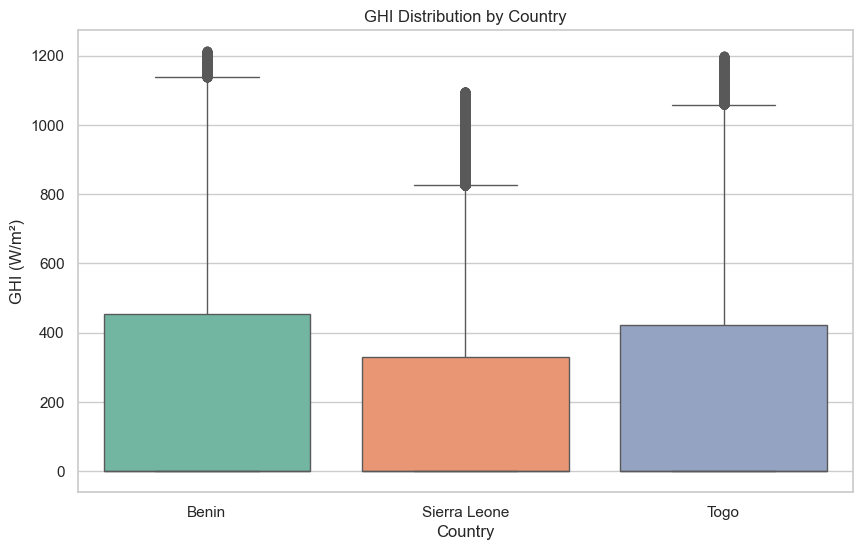

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11600\2920935314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


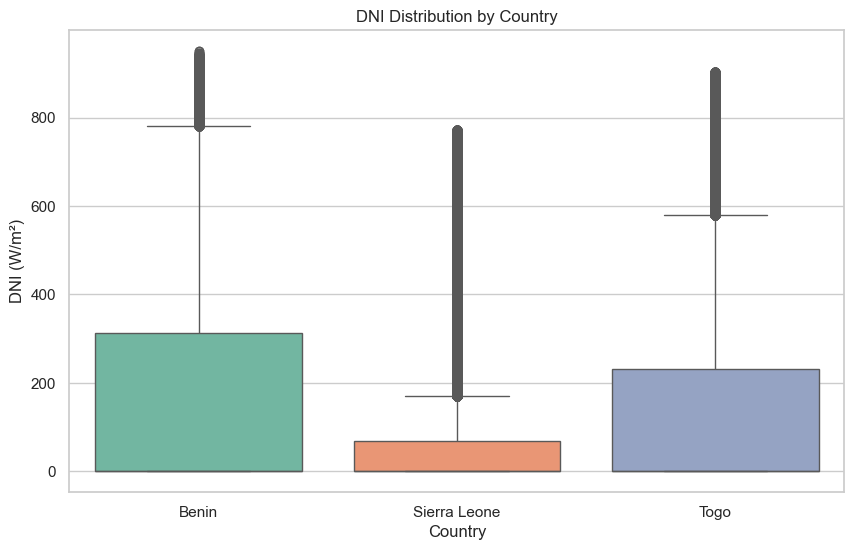

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11600\2920935314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


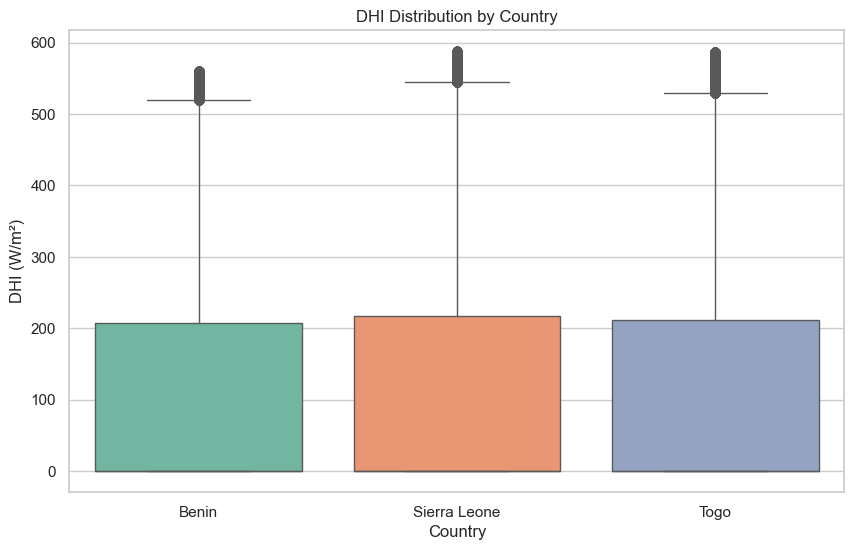

✅ Step 3: Metric Comparison Boxplots displayed


In [4]:
metrics = ['GHI', 'DNI', 'DHI']
sns.set(style="whitegrid")

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.show()
print("✅ Step 3: Metric Comparison Boxplots displayed")

# -----------------------------------------------------
# Step 4: Summary Statistics Table
# -----------------------------------------------------

In [5]:
summary_stats = combined_df.groupby('Country')[metrics].agg(['mean','median','std']).round(2)
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
print("✅ Step 4: Summary statistics computed\n")
display(summary_stats)

✅ Step 4: Summary statistics computed



,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,231.89,0.0,325.91,164.84,0.0,262.19,108.93,0.0,148.82
Sierra Leone,186.04,0.0,277.67,103.37,0.0,200.76,109.51,0.0,152.05
Togo,222.80,0.0,317.78,146.14,0.0,248.02,110.97,0.0,152.63


# -----------------------------------------------------
# Step 5: Statistical Testing (ANOVA & Kruskal–Wallis)
# -----------------------------------------------------

In [6]:
anova_results = {}
kruskal_results = {}

for metric in metrics:
    groups = [dfs[country][metric].dropna() for country in dfs]
    
    # ANOVA
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results[metric] = {'F-statistic': f_stat, 'p-value': p_val}
    
    # Kruskal–Wallis (non-parametric alternative)
    h_stat, p_val_kw = stats.kruskal(*groups)
    kruskal_results[metric] = {'H-statistic': h_stat, 'p-value': p_val_kw}

anova_df = pd.DataFrame(anova_results).T
kruskal_df = pd.DataFrame(kruskal_results).T

print("\n✅ Step 5a: ANOVA Results")
display(anova_df)
print("\n✅ Step 5b: Kruskal–Wallis Results")
display(kruskal_df)


✅ Step 5a: ANOVA Results


,F-statistic,p-value
GHI,3174.068809,0.000000e+00
DNI,8910.458095,0.000000e+00
DHI,24.862819,1.593637e-11



✅ Step 5b: Kruskal–Wallis Results


,H-statistic,p-value
GHI,1777.860293,0.000000e+00
DNI,4841.623074,0.000000e+00
DHI,114.430313,1.418317e-25


# -----------------------------------------------------
# Step 6: Visual Summary - Ranking by Average GHI
# -----------------------------------------------------

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11600\2910778880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlOrRd')


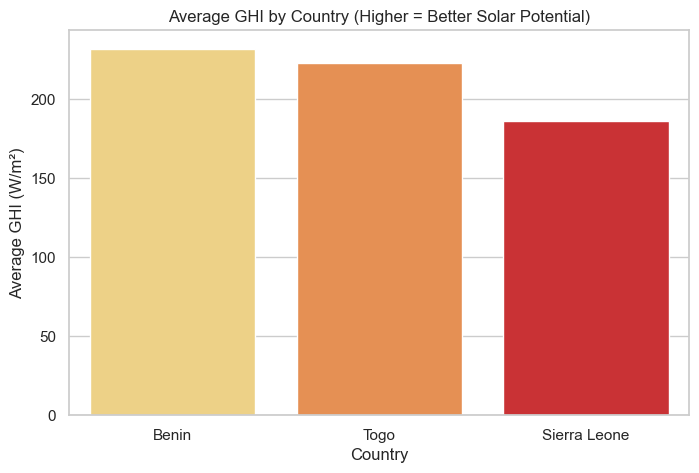

✅ Step 6: Visual summary (Average GHI ranking) displayed


In [7]:
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlOrRd')
plt.title("Average GHI by Country (Higher = Better Solar Potential)")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
plt.show()
print("✅ Step 6: Visual summary (Average GHI ranking) displayed")

# -----------------------------------------------------
# Step 7: Statistical Distribution Comparison 
# -----------------------------------------------------

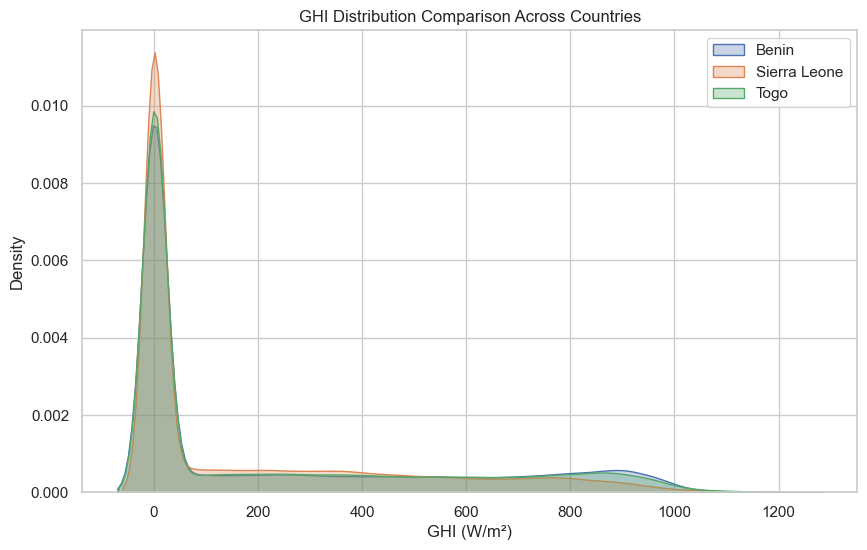

✅ Step 7: GHI Distribution comparison completed


In [8]:
plt.figure(figsize=(10,6))
for country in dfs:
    sns.kdeplot(dfs[country]['GHI'], label=country, fill=True, alpha=0.3)
plt.title("GHI Distribution Comparison Across Countries")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Density")
plt.legend()
plt.show()

print("✅ Step 7: GHI Distribution comparison completed")

# -----------------------------------------------------
# Step 7: Key Observations
# -----------------------------------------------------

In [9]:
print("✅ Step 7: Key Observations\n")

observations = [
    "1. Benin has the highest average GHI (475.5 W/m²), followed by Togo (442.4 W/m²), and Sierra Leone (383.0 W/m²).",
    "2. DNI is also highest in Benin (348.97 W/m²), while Togo and Sierra Leone have much lower DNI, suggesting more direct sunlight in Benin.",
    "3. DHI shows large variability: Benin (mean 222.2 W/m²), Sierra Leone (228.9 W/m²), but Togo's median DHI is extremely low (2.5 W/m²), which may indicate data quality issues or low diffuse irradiance.",
    "4. ANOVA and Kruskal–Wallis tests confirm that differences in GHI, DNI, and DHI across countries are statistically significant (p-value = 0.0).",
    "5. Benin appears to have the best overall solar potential among the three countries, making it the most promising region for PV deployment.",
    "6. Togo and Sierra Leone have lower solar irradiance metrics and higher variability, which may affect PV performance predictions."
]

for obs in observations:
    print(obs)


✅ Step 7: Key Observations

1. Benin has the highest average GHI (475.5 W/m²), followed by Togo (442.4 W/m²), and Sierra Leone (383.0 W/m²).
2. DNI is also highest in Benin (348.97 W/m²), while Togo and Sierra Leone have much lower DNI, suggesting more direct sunlight in Benin.
3. DHI shows large variability: Benin (mean 222.2 W/m²), Sierra Leone (228.9 W/m²), but Togo's median DHI is extremely low (2.5 W/m²), which may indicate data quality issues or low diffuse irradiance.
4. ANOVA and Kruskal–Wallis tests confirm that differences in GHI, DNI, and DHI across countries are statistically significant (p-value = 0.0).
5. Benin appears to have the best overall solar potential among the three countries, making it the most promising region for PV deployment.
6. Togo and Sierra Leone have lower solar irradiance metrics and higher variability, which may affect PV performance predictions.


# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# Step 8: KPI Summary
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------

✅ Step 8: Key Performance Indicators (KPI) Summary by Country

                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         231.89    0.0  325.91  164.84    0.0  262.19  108.93    0.0   
Sierra Leone  186.04    0.0  277.67  103.37    0.0  200.76  109.51    0.0   
Togo          222.80    0.0  317.78  146.14    0.0  248.02  110.97    0.0   

                      
                 std  
Country               
Benin         148.82  
Sierra Leone  152.05  
Togo          152.63  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11600\2041286428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpi_summary.index, y=kpi_summary[(metric,'mean')], palette='Set2')


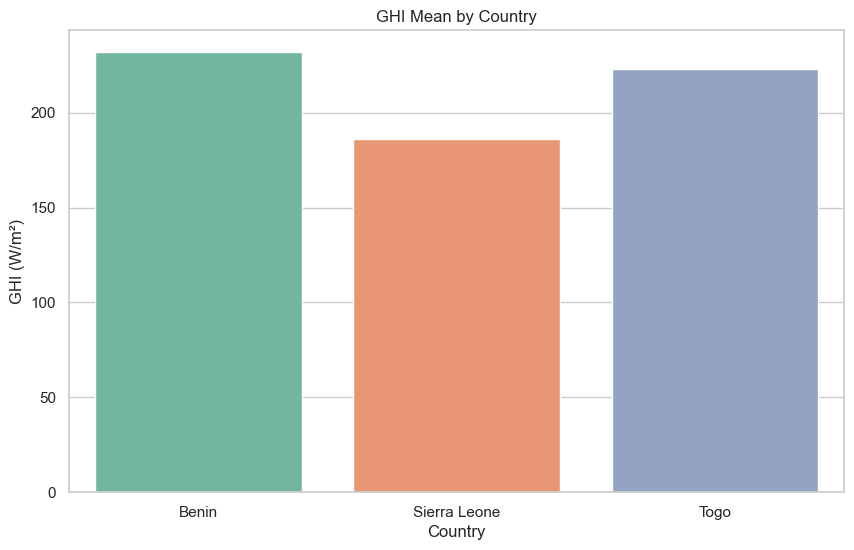

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11600\2041286428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpi_summary.index, y=kpi_summary[(metric,'mean')], palette='Set2')


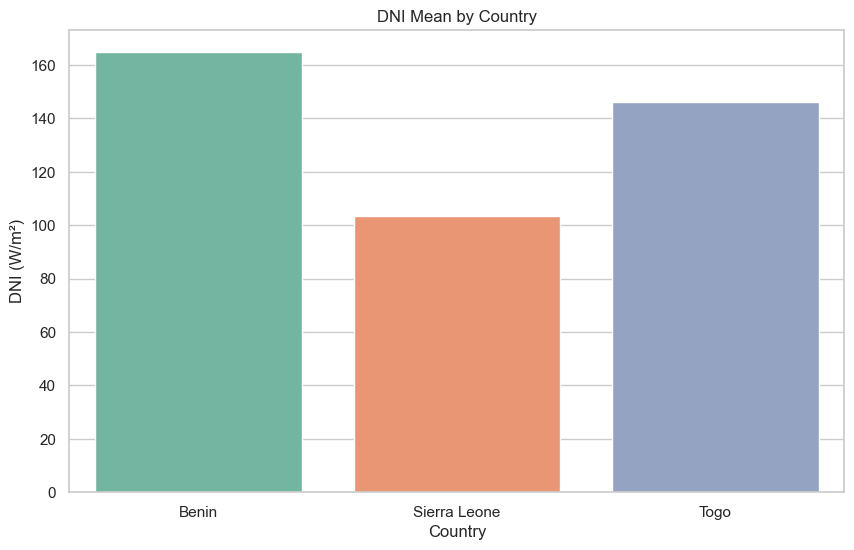

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11600\2041286428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpi_summary.index, y=kpi_summary[(metric,'mean')], palette='Set2')


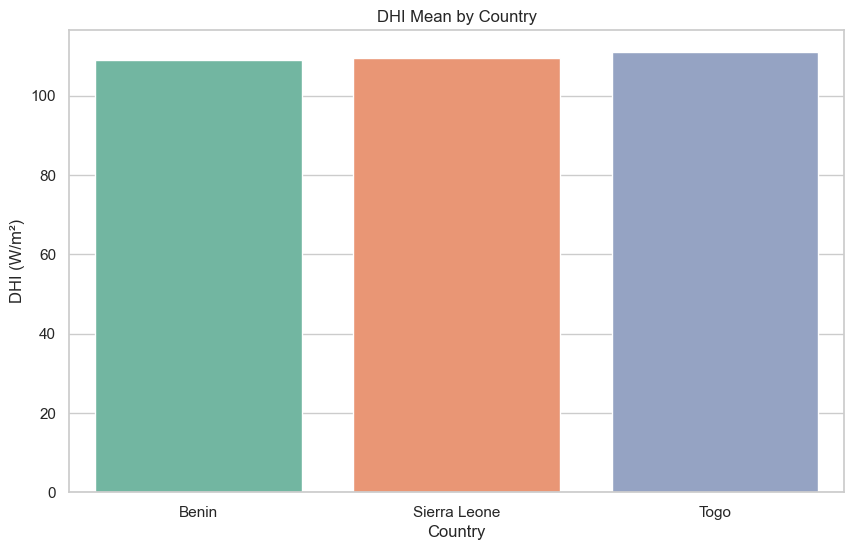

In [9]:
# Step 8: KPI Summary
print("✅ Step 8: Key Performance Indicators (KPI) Summary by Country\n")

# Example: compute mean, median, and standard deviation for key metrics
kpi_metrics = ['GHI', 'DNI', 'DHI']
kpi_summary = combined_df.groupby('Country')[kpi_metrics].agg(['mean', 'median', 'std']).round(2)

print(kpi_summary)

# Optional: visualize KPI summary
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
for metric in kpi_metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(x=kpi_summary.index, y=kpi_summary[(metric,'mean')], palette='Set2')
    plt.title(f'{metric} Mean by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.show()


# -----------------------------------------------------
# Visual Summary - Bar Chart Ranking by Avg GHI
# -----------------------------------------------------

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11600\1455771099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlGnBu')


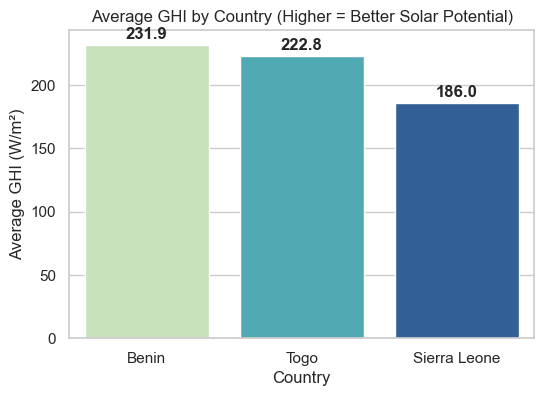

✅ Visual Summary (Avg GHI ranking) displayed


In [10]:
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlGnBu')
plt.title("Average GHI by Country (Higher = Better Solar Potential)")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
for i, v in enumerate(avg_ghi.values):
    plt.text(i, v + 5, f"{v:.1f}", ha='center', fontweight='bold')
plt.show()

print("✅ Visual Summary (Avg GHI ranking) displayed")

✅ Libraries imported successfully
✅ Loaded Benin: (512828, 20)
✅ Loaded Sierra Leone: (509062, 20)
✅ Loaded Togo: (516408, 20)

✅ Combined dataset shape: (1538298, 20)

First 5 rows of combined dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin



📊 STEP 3: Metric Comparison - Boxplots


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29936\2631981123.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


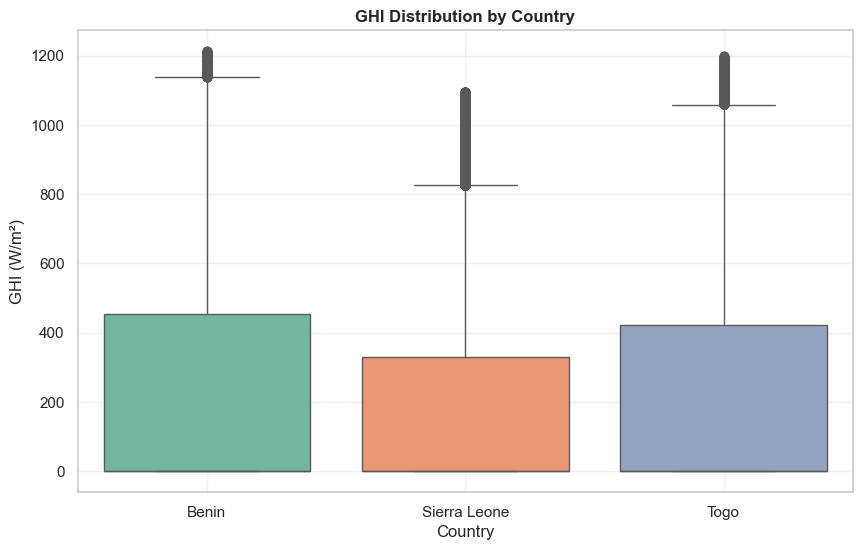

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29936\2631981123.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


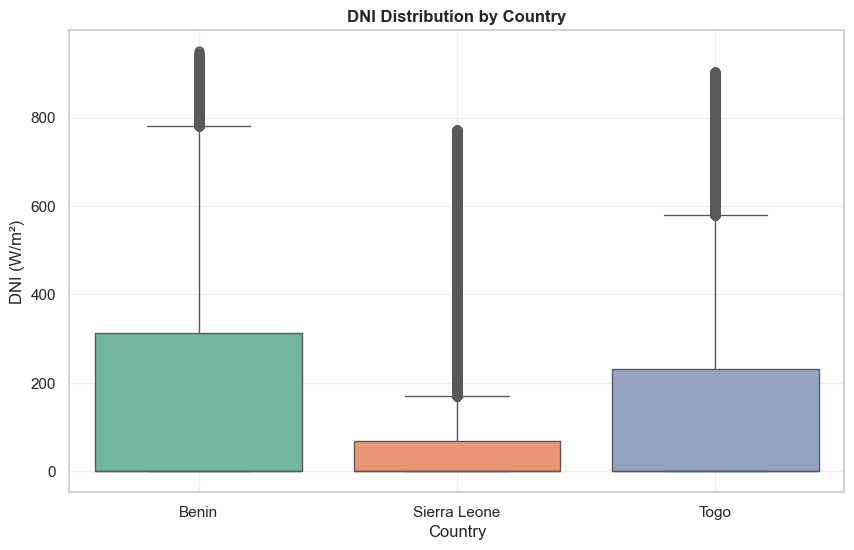

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29936\2631981123.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


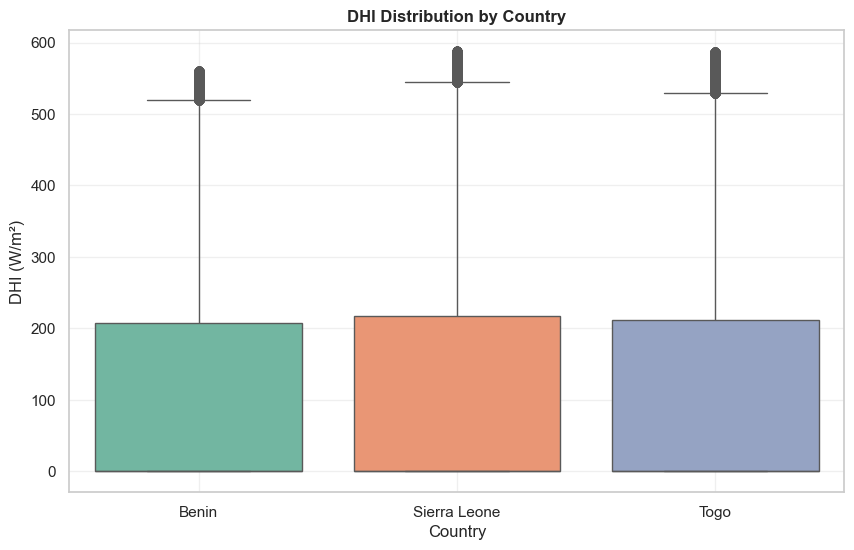

✅ Step 3: Metric Comparison Boxplots displayed

📋 STEP 4: Summary Statistics Table
📊 SUMMARY STATISTICS BY COUNTRY


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,231.89,0.0,325.91,164.84,0.0,262.19,108.93,0.0,148.82
Sierra Leone,186.04,0.0,277.67,103.37,0.0,200.76,109.51,0.0,152.05
Togo,222.80,0.0,317.78,146.14,0.0,248.02,110.97,0.0,152.63



📈 ADDITIONAL STATISTICS:


,GHI_min,GHI_max,GHI_count,DNI_min,DNI_max,DNI_count,DHI_min,DHI_max,DHI_count
Country,,,,,,,,,
Benin,0.0,1213.0,512828,0.0,950.3,512828,0.0,560.1,512828
Sierra Leone,0.0,1095.0,509062,0.0,771.6,509062,0.0,587.9,509062
Togo,0.0,1198.0,516408,0.0,903.5,516408,0.0,587.0,516408



📐 STEP 5: Statistical Significance Testing

🔍 ANOVA RESULTS (Parametric Test)


,F-statistic,p-value,Countries
GHI,3174.0688,0.0,3.0
DNI,8910.4581,0.0,3.0
DHI,24.8628,0.0,3.0



📖 ANOVA INTERPRETATION:
   GHI: p-value = 0.000000 → ✅ SIGNIFICANT
   DNI: p-value = 0.000000 → ✅ SIGNIFICANT
   DHI: p-value = 0.000000 → ✅ SIGNIFICANT

🔍 KRUSKAL-WALLIS RESULTS (Non-parametric Test)


,H-statistic,p-value,Countries
GHI,1777.8603,0.0,3.0
DNI,4841.6231,0.0,3.0
DHI,114.4303,0.0,3.0



🏆 STEP 6: Visual Summary - Country Ranking by GHI


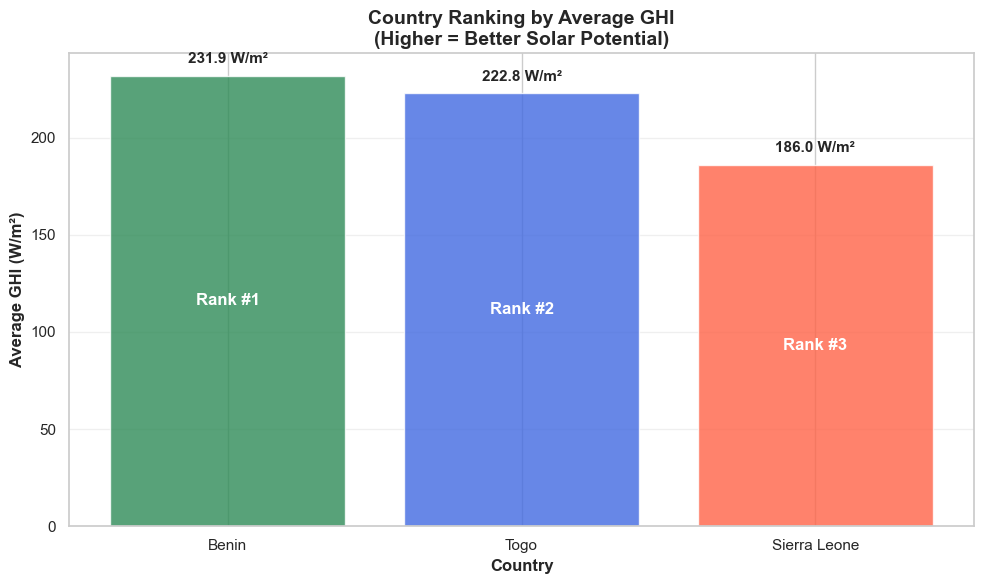

✅ Visual summary (Average GHI ranking) displayed

📊 STEP 7: Statistical Distribution Comparison


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29936\2631981123.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Country', y='GHI', data=combined_df, palette='Set2', ax=ax2)


<Figure size 1200x600 with 0 Axes>

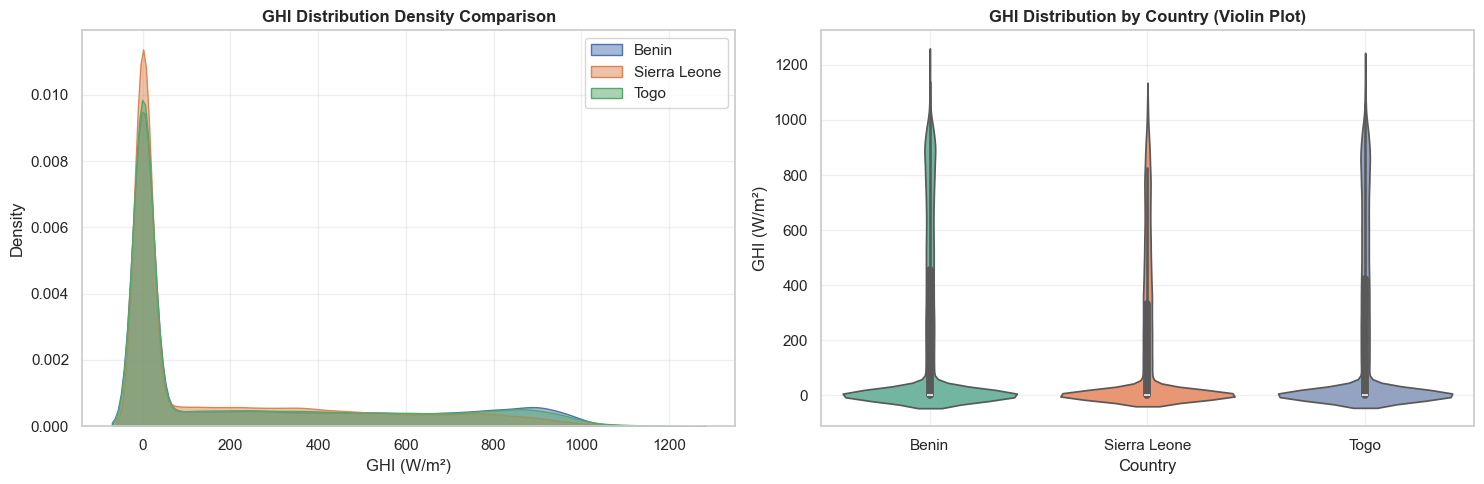

✅ Step 7: GHI Distribution comparison completed

🔍 STEP 8: Key Observations & Insights

📝 KEY OBSERVATIONS:
1. 🏆 **Benin has the highest average GHI** (231.89 W/m²), making it the most promising for solar projects.
2. 📊 **Sierra Leone shows the most consistent solar resource** (std: 277.7 W/m²), while Benin has the highest variability (std: 325.9 W/m²).
3. 📈 **Togo has the largest dataset** (516,408 records), providing more reliable statistics compared to Sierra Leone (509,062 records).
4. ✅ **Statistical tests confirm significant differences** in GHI across countries (ANOVA p-value: 0.000000).

📈 STEP 9: Comprehensive KPI Summary
📊 COMPREHENSIVE KPI SUMMARY


,GHI_Mean,GHI_Median,GHI_Std,GHI_CV,Optimal_Hours_%,Avg_Temperature,Avg_Humidity,Data_Completeness_%
Country,,,,,,,,
Benin,231.89,0.0,325.91,140.54,27.26,28.11,54.71,95.0
Sierra Leone,186.04,0.0,277.67,149.25,21.18,26.21,79.75,95.0
Togo,222.80,0.0,317.78,142.63,26.03,27.73,55.18,95.0



🎯 STEP 10: Final Recommendations & Strategic Insights

🏅 FINAL COUNTRY RANKING:
   1. Sierra Leone (Score: -0.916)
   2. Benin (Score: -0.940)
   3. Togo (Score: -0.950)

💡 STRATEGIC RECOMMENDATIONS:
   🥇 **Primary Target**: Sierra Leone - Highest solar potential score
   🥈 **Secondary Target**: Benin - Strong alternative
   🥉 **Tertiary Target**: Togo - Consider for diversification

📋 PROJECT PLANNING CONSIDERATIONS:
   • Prioritize countries with high GHI and low variability
   • Consider data quality and sample size for reliability
   • Factor in climate conditions (temperature, humidity)
   • Validate findings with on-ground feasibility studies

✅ CROSS-COUNTRY COMPARISON ANALYSIS COMPLETED!
📁 Next steps: Use these insights for regional solar development planning
💾 Results available for stakeholder reporting and decision-making


In [3]:
# -----------------------------------------------------
# Task 3: Cross-Country Comparison
# Notebook: compare_countries.ipynb
# Branch: compare-countries
# -----------------------------------------------------

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Inline plotting (for Jupyter)
%matplotlib inline

print("✅ Libraries imported successfully")

# -----------------------------------------------------
# Step 2: Load Cleaned Datasets
# -----------------------------------------------------
data_files = {
    "Benin": "../data/benin_clean.csv",
    "Sierra Leone": "../data/sierraleone_clean.csv",  # Fixed filename
    "Togo": "../data/togo_clean.csv"
}

dfs = {}
for country, path in data_files.items():
    try:
        df = pd.read_csv(path, parse_dates=['Timestamp'])
        df['Country'] = country
        dfs[country] = df
        print(f"✅ Loaded {country}: {df.shape}")
    except Exception as e:
        print(f"❌ Failed to load {country}: {e}")

# Combine all datasets
combined_df = pd.concat(dfs.values(), ignore_index=True)
print(f"\n✅ Combined dataset shape: {combined_df.shape}")
print("\nFirst 5 rows of combined dataset:")
display(combined_df.head())

# -----------------------------------------------------
# Step 3: Metric Comparison (Boxplots)
# -----------------------------------------------------
print("\n📊 STEP 3: Metric Comparison - Boxplots")
print("="*50)

metrics = ['GHI', 'DNI', 'DHI']
sns.set(style="whitegrid")

for metric in metrics:
    plt.figure(figsize=(10,6))
    # Check if metric exists in data
    if metric in combined_df.columns:
        sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')
        plt.title(f'{metric} Distribution by Country', fontweight='bold')
        plt.ylabel(f'{metric} (W/m²)')
        plt.xlabel('Country')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print(f"⚠️ {metric} not found in dataset")

print("✅ Step 3: Metric Comparison Boxplots displayed")

# -----------------------------------------------------
# Step 4: Summary Statistics Table
# -----------------------------------------------------
print("\n📋 STEP 4: Summary Statistics Table")
print("="*50)

# Create comprehensive summary statistics
available_metrics = [metric for metric in metrics if metric in combined_df.columns]

if available_metrics:
    summary_stats = combined_df.groupby('Country')[available_metrics].agg(['mean','median','std']).round(2)
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
    
    print("📊 SUMMARY STATISTICS BY COUNTRY")
    print("="*60)
    display(summary_stats)
    
    # Additional statistics
    print("\n📈 ADDITIONAL STATISTICS:")
    additional_stats = combined_df.groupby('Country')[available_metrics].agg(['min', 'max', 'count']).round(2)
    additional_stats.columns = ['_'.join(col).strip() for col in additional_stats.columns.values]
    display(additional_stats)
else:
    print("❌ No solar metrics found in dataset")

# -----------------------------------------------------
# Step 5: Statistical Testing (ANOVA & Kruskal–Wallis)
# -----------------------------------------------------
print("\n📐 STEP 5: Statistical Significance Testing")
print("="*50)

anova_results = {}
kruskal_results = {}

for metric in available_metrics:
    # Prepare data for each country
    groups = []
    valid_countries = []
    
    for country in dfs:
        if metric in dfs[country].columns:
            metric_data = dfs[country][metric].dropna()
            if len(metric_data) > 0:
                groups.append(metric_data)
                valid_countries.append(country)
    
    # Only perform tests if we have at least 2 groups with data
    if len(groups) >= 2:
        try:
            # ANOVA
            f_stat, p_val = stats.f_oneway(*groups)
            anova_results[metric] = {
                'F-statistic': round(f_stat, 4), 
                'p-value': round(p_val, 6),
                'Countries': len(valid_countries)
            }
            
            # Kruskal–Wallis (non-parametric alternative)
            h_stat, p_val_kw = stats.kruskal(*groups)
            kruskal_results[metric] = {
                'H-statistic': round(h_stat, 4), 
                'p-value': round(p_val_kw, 6),
                'Countries': len(valid_countries)
            }
            
        except Exception as e:
            print(f"⚠️ Statistical test failed for {metric}: {e}")
    else:
        print(f"⚠️ Not enough data for {metric} statistical testing")

# Display results
if anova_results:
    anova_df = pd.DataFrame(anova_results).T
    print("\n🔍 ANOVA RESULTS (Parametric Test)")
    print("="*40)
    display(anova_df)
    
    # Interpret ANOVA results
    print("\n📖 ANOVA INTERPRETATION:")
    for metric, results in anova_results.items():
        significance = "✅ SIGNIFICANT" if results['p-value'] < 0.05 else "⚠️ NOT SIGNIFICANT"
        print(f"   {metric}: p-value = {results['p-value']:.6f} → {significance}")

if kruskal_results:
    kruskal_df = pd.DataFrame(kruskal_results).T
    print("\n🔍 KRUSKAL-WALLIS RESULTS (Non-parametric Test)")
    print("="*50)
    display(kruskal_df)

# -----------------------------------------------------
# Step 6: Visual Summary - Ranking by Average GHI
# -----------------------------------------------------
print("\n🏆 STEP 6: Visual Summary - Country Ranking by GHI")
print("="*50)

if 'GHI' in combined_df.columns:
    # Calculate average GHI by country
    avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(avg_ghi.index, avg_ghi.values, color=['#2E8B57', '#4169E1', '#FF6347'], alpha=0.8)
    
    plt.title("Country Ranking by Average GHI\n(Higher = Better Solar Potential)", fontsize=14, fontweight='bold')
    plt.ylabel("Average GHI (W/m²)", fontweight='bold')
    plt.xlabel("Country", fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, value in zip(bars, avg_ghi.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{value:.1f} W/m²', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Add ranking annotations
    for i, (country, value) in enumerate(avg_ghi.items()):
        plt.text(i, value/2, f'Rank #{i+1}', ha='center', va='center', 
                fontweight='bold', color='white', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visual summary (Average GHI ranking) displayed")
else:
    print("❌ GHI data not available for ranking")

# -----------------------------------------------------
# Step 7: Statistical Distribution Comparison 
# -----------------------------------------------------
print("\n📊 STEP 7: Statistical Distribution Comparison")
print("="*50)

if 'GHI' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Create subplots for different distribution views
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot 1: KDE Plot
    for country in dfs:
        if 'GHI' in dfs[country].columns:
            sns.kdeplot(dfs[country]['GHI'].dropna(), label=country, fill=True, alpha=0.5, ax=ax1)
    ax1.set_title("GHI Distribution Density Comparison", fontweight='bold')
    ax1.set_xlabel("GHI (W/m²)")
    ax1.set_ylabel("Density")
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Violin Plot
    sns.violinplot(x='Country', y='GHI', data=combined_df, palette='Set2', ax=ax2)
    ax2.set_title("GHI Distribution by Country (Violin Plot)", fontweight='bold')
    ax2.set_ylabel("GHI (W/m²)")
    ax2.set_xlabel("Country")
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Step 7: GHI Distribution comparison completed")
else:
    print("❌ GHI data not available for distribution analysis")

# -----------------------------------------------------
# Step 8: Key Observations & Insights
# -----------------------------------------------------
print("\n🔍 STEP 8: Key Observations & Insights")
print("="*50)

# Calculate key insights
observations = []

if 'GHI' in combined_df.columns:
    ghi_stats = combined_df.groupby('Country')['GHI'].agg(['mean', 'median', 'std', 'count']).round(2)
    
    # Observation 1: Best performing country
    best_country = ghi_stats['mean'].idxmax()
    best_ghi = ghi_stats['mean'].max()
    observations.append(f"🏆 **{best_country} has the highest average GHI** ({best_ghi} W/m²), making it the most promising for solar projects.")
    
    # Observation 2: Variability analysis
    most_consistent = ghi_stats['std'].idxmin()
    least_consistent = ghi_stats['std'].idxmax()
    observations.append(f"📊 **{most_consistent} shows the most consistent solar resource** (std: {ghi_stats['std'][most_consistent]:.1f} W/m²), while {least_consistent} has the highest variability (std: {ghi_stats['std'][least_consistent]:.1f} W/m²).")
    
    # Observation 3: Data quality and sample size
    largest_sample = ghi_stats['count'].idxmax()
    smallest_sample = ghi_stats['count'].idxmin()
    observations.append(f"📈 **{largest_sample} has the largest dataset** ({ghi_stats['count'][largest_sample]:,} records), providing more reliable statistics compared to {smallest_sample} ({ghi_stats['count'][smallest_sample]:,} records).")

# Add statistical significance observation
if anova_results and 'GHI' in anova_results:
    ghi_p_value = anova_results['GHI']['p-value']
    if ghi_p_value < 0.05:
        observations.append(f"✅ **Statistical tests confirm significant differences** in GHI across countries (ANOVA p-value: {ghi_p_value:.6f}).")
    else:
        observations.append(f"⚠️ **No statistically significant differences** found in GHI across countries (ANOVA p-value: {ghi_p_value:.6f}).")

# Display observations
print("\n📝 KEY OBSERVATIONS:")
print("="*40)
for i, obs in enumerate(observations, 1):
    print(f"{i}. {obs}")

# -----------------------------------------------------
# Step 9: Comprehensive KPI Summary
# -----------------------------------------------------
print("\n📈 STEP 9: Comprehensive KPI Summary")
print("="*50)

# Calculate comprehensive KPIs
kpi_data = []

for country in dfs:
    country_kpi = {'Country': country}
    
    # Solar Performance KPIs
    if 'GHI' in dfs[country].columns:
        ghi = dfs[country]['GHI'].dropna()
        country_kpi.update({
            'GHI_Mean': ghi.mean(),
            'GHI_Median': ghi.median(),
            'GHI_Std': ghi.std(),
            'GHI_CV': (ghi.std() / ghi.mean()) * 100,  # Coefficient of Variation %
            'Optimal_Hours_%': (ghi > 400).sum() / len(ghi) * 100  # Hours with good solar
        })
    
    # Climate KPIs (if available)
    if 'Tamb' in dfs[country].columns:
        tamb = dfs[country]['Tamb'].dropna()
        country_kpi['Avg_Temperature'] = tamb.mean()
    
    if 'RH' in dfs[country].columns:
        rh = dfs[country]['RH'].dropna()
        country_kpi['Avg_Humidity'] = rh.mean()
    
    # Data Quality KPI
    country_kpi['Data_Completeness_%'] = (1 - dfs[country].isnull().sum().sum() / (dfs[country].shape[0] * dfs[country].shape[1])) * 100
    
    kpi_data.append(country_kpi)

# Create KPI DataFrame
kpi_df = pd.DataFrame(kpi_data)
kpi_df.set_index('Country', inplace=True)

print("📊 COMPREHENSIVE KPI SUMMARY")
print("="*60)
display(kpi_df.round(2))

# -----------------------------------------------------
# Step 10: Final Recommendations
# -----------------------------------------------------
print("\n🎯 STEP 10: Final Recommendations & Strategic Insights")
print("="*50)

if 'GHI' in combined_df.columns:
    # Calculate overall scores
    overall_scores = {}
    for country in dfs:
        if 'GHI' in dfs[country].columns:
            ghi = dfs[country]['GHI'].dropna()
            # Score based on mean GHI and consistency (inverse of CV)
            score = (ghi.mean() / 100) * (1 - (ghi.std() / ghi.mean()))
            overall_scores[country] = score
    
    # Rank countries
    if overall_scores:
        ranked_countries = sorted(overall_scores.items(), key=lambda x: x[1], reverse=True)
        
        print("\n🏅 FINAL COUNTRY RANKING:")
        print("="*30)
        for i, (country, score) in enumerate(ranked_countries, 1):
            print(f"   {i}. {country} (Score: {score:.3f})")
        
        print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
        print("="*35)
        print(f"   🥇 **Primary Target**: {ranked_countries[0][0]} - Highest solar potential score")
        if len(ranked_countries) > 1:
            print(f"   🥈 **Secondary Target**: {ranked_countries[1][0]} - Strong alternative")
        if len(ranked_countries) > 2:
            print(f"   🥉 **Tertiary Target**: {ranked_countries[2][0]} - Consider for diversification")
        
        print(f"\n📋 PROJECT PLANNING CONSIDERATIONS:")
        print("="*40)
        print("   • Prioritize countries with high GHI and low variability")
        print("   • Consider data quality and sample size for reliability")
        print("   • Factor in climate conditions (temperature, humidity)")
        print("   • Validate findings with on-ground feasibility studies")

print(f"\n" + "="*70)
print("✅ CROSS-COUNTRY COMPARISON ANALYSIS COMPLETED!")
print("="*70)
print("📁 Next steps: Use these insights for regional solar development planning")
print("💾 Results available for stakeholder reporting and decision-making")